## Dependencias

In [1]:
from functools import reduce

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import warnings

from scipy import stats
from sklearn.impute import SimpleImputer
from varclushi import VarClusHi

pd.set_option('display.max_columns', None)
sns.set_palette('colorblind')
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

## Análisis exploratorio de los datos de entrenamiento

### Lectura de los datos de entrenamiento

In [2]:
train = pd.read_csv('~/train.csv')
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,20000,20000,20000.0,36 months,10.16,646.85,B,B1,10+ years,MORTGAGE,90000.0,Not Verified,debt_consolidation,PA,17.95,0.0,0.0,14.0,0.0,36852,57.9,29.0,f,0.0,0.0,0.0,114918.0,63600.0,0
1,20000,20000,19900.0,36 months,8.90,635.07,A,A5,4 years,MORTGAGE,120000.0,Source Verified,debt_consolidation,LA,9.83,0.0,0.0,19.0,0.0,10685,26.6,38.0,f,0.0,0.0,0.0,242810.0,40200.0,0
2,28000,28000,27950.0,60 months,19.47,733.60,D,D5,5 years,MORTGAGE,85000.0,Source Verified,debt_consolidation,OH,20.07,1.0,1.0,10.0,0.0,27927,78.4,19.0,w,0.0,0.0,86.0,316774.0,35600.0,0
3,25000,25000,25000.0,36 months,8.39,787.92,A,A5,< 1 year,OWN,72000.0,Source Verified,credit_card,CA,10.80,0.0,0.0,10.0,0.0,24415,32.4,14.0,f,0.0,0.0,0.0,24415.0,75300.0,0
4,5500,5500,5500.0,36 months,10.74,179.39,B,B2,NaN,RENT,37000.0,Verified,debt_consolidation,NY,5.58,0.0,1.0,7.0,0.0,4531,52.7,15.0,f,0.0,0.0,NaN,NaN,NaN,0


### tipos de datos

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326399 entries, 0 to 326398
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   326399 non-null  int64  
 1   funded_amnt                 326399 non-null  int64  
 2   funded_amnt_inv             326399 non-null  float64
 3   term                        326399 non-null  object 
 4   int_rate                    326399 non-null  float64
 5   installment                 326399 non-null  float64
 6   grade                       326399 non-null  object 
 7   sub_grade                   326399 non-null  object 
 8   emp_length                  311790 non-null  object 
 9   home_ownership              326399 non-null  object 
 10  annual_inc                  326397 non-null  float64
 11  verification_status         326399 non-null  object 
 12  purpose                     326399 non-null  object 
 13  addr_state    

### Definición de las variables

In [4]:
varc = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc',   #variables continuas (numericas)
         'dti', 'delinq_2yrs', 'inq_last_6mths',  'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
         'total_acc','collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
         'total_rev_hi_lim']

vard = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', #variables discretas (categoricas),
         'purpose', 'addr_state', 'initial_list_status']

target = ['target']

### Análisis de las variables continuas

#### Valores faltantes

In [5]:
nulos=[*filter(lambda x: train[x].isnull().sum() > 0, varc)] #variables con nulos
nulos

['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

<Axes: title={'center': 'Porcentaje de valores faltantes en variables continuas'}, xlabel='Porcentaje de valores faltantes', ylabel='Variables'>

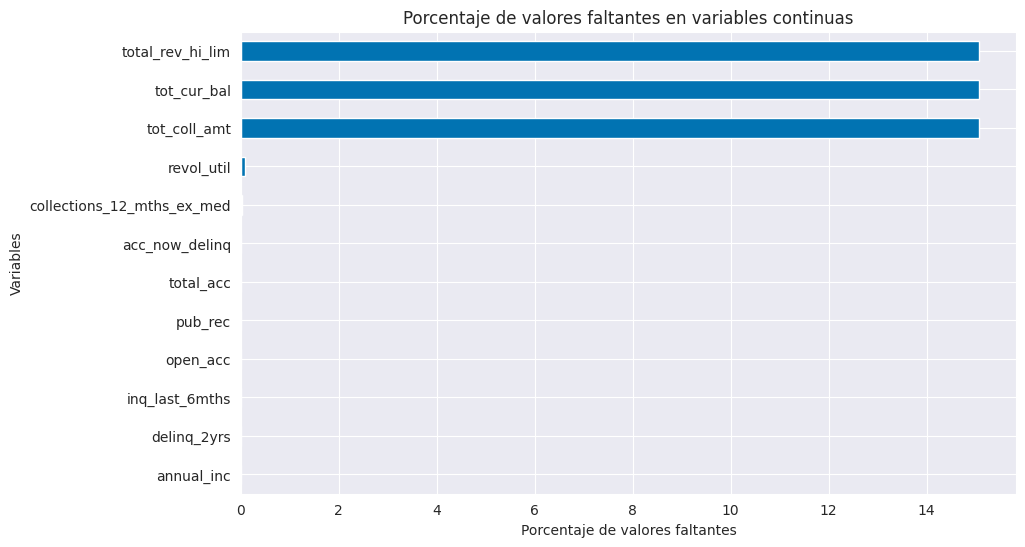

In [6]:
(train[nulos].isna().mean()*100).sort_values(
).plot(kind='barh',figsize=(10,6),title='Porcentaje de valores faltantes en variables continuas',xlabel='Porcentaje de valores faltantes',ylabel='Variables')

In [7]:
im = SimpleImputer(strategy='median')
im.fit(train[varc])

SimpleImputer(strategy='median')

In [8]:
X_i=pd.DataFrame(im.transform(train[varc]),columns=varc) #imputamos valores faltantes con la mediana
X_i['target']=train['target']
X_i.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,20000.0,20000.0,20000.0,10.16,646.85,90000.0,17.95,0.0,0.0,14.0,0.0,36852.0,57.9,29.0,0.0,0.0,0.0,114918.0,63600.0,0
1,20000.0,20000.0,19900.0,8.90,635.07,120000.0,9.83,0.0,0.0,19.0,0.0,10685.0,26.6,38.0,0.0,0.0,0.0,242810.0,40200.0,0
2,28000.0,28000.0,27950.0,19.47,733.60,85000.0,20.07,1.0,1.0,10.0,0.0,27927.0,78.4,19.0,0.0,0.0,86.0,316774.0,35600.0,0
3,25000.0,25000.0,25000.0,8.39,787.92,72000.0,10.80,0.0,0.0,10.0,0.0,24415.0,32.4,14.0,0.0,0.0,0.0,24415.0,75300.0,0
4,5500.0,5500.0,5500.0,10.74,179.39,37000.0,5.58,0.0,1.0,7.0,0.0,4531.0,52.7,15.0,0.0,0.0,0.0,81711.0,22900.0,0


In [9]:
ks=pd.DataFrame(map(lambda x: (x,round(stats.ks_2samp(X_i[x],train[x].dropna()).statistic,3)),nulos),columns=['variable','ks']) #calculamos estadistico ks
ks #el estadistico ks es pequeño, por lo la imputacion no afecto la distribucion de las variables

,variable,ks
0,annual_inc,0.000
1,delinq_2yrs,0.000
2,inq_last_6mths,0.000
3,open_acc,0.000
4,pub_rec,0.000
5,revol_util,0.000
6,total_acc,0.000
7,collections_12_mths_ex_med,0.000
8,acc_now_delinq,0.000
9,tot_coll_amt,0.019


#### Valores atípicos

In [10]:
X_i[varc].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
loan_amnt,326399.0,14325.621325,8287.228268,500.00,1750.00,3500.00,8000.00,12000.00,20000.00,30100.00,35000.00,35000.00
funded_amnt,326399.0,14300.155255,8275.564552,500.00,1750.00,3500.00,8000.00,12000.00,20000.00,30000.00,35000.00,35000.00
funded_amnt_inv,326399.0,14230.921892,8298.824001,0.00,1500.00,3250.00,8000.00,12000.00,19975.00,30000.00,35000.00,35000.00
int_rate,326399.0,13.823752,4.353396,5.42,6.03,6.99,10.99,13.66,16.49,21.70,24.89,26.06
installment,326399.0,432.310864,243.485864,15.67,57.40,114.82,256.88,380.36,567.30,900.93,1190.28,1409.99
annual_inc,326399.0,73323.786610,54509.025416,1896.00,18700.00,28000.00,45000.00,63000.00,89000.00,150000.00,245000.00,7446395.00
dti,326399.0,17.222658,7.857185,0.00,1.66,4.82,11.36,16.87,22.79,30.80,34.69,39.99
delinq_2yrs,326399.0,0.284581,0.799307,0.00,0.00,0.00,0.00,0.00,0.00,2.00,4.00,29.00
inq_last_6mths,326399.0,0.803872,1.092169,0.00,0.00,0.00,0.00,0.00,1.00,3.00,4.00,33.00
open_acc,326399.0,11.187311,4.985253,0.00,3.00,5.00,8.00,10.00,14.00,20.00,26.00,84.00


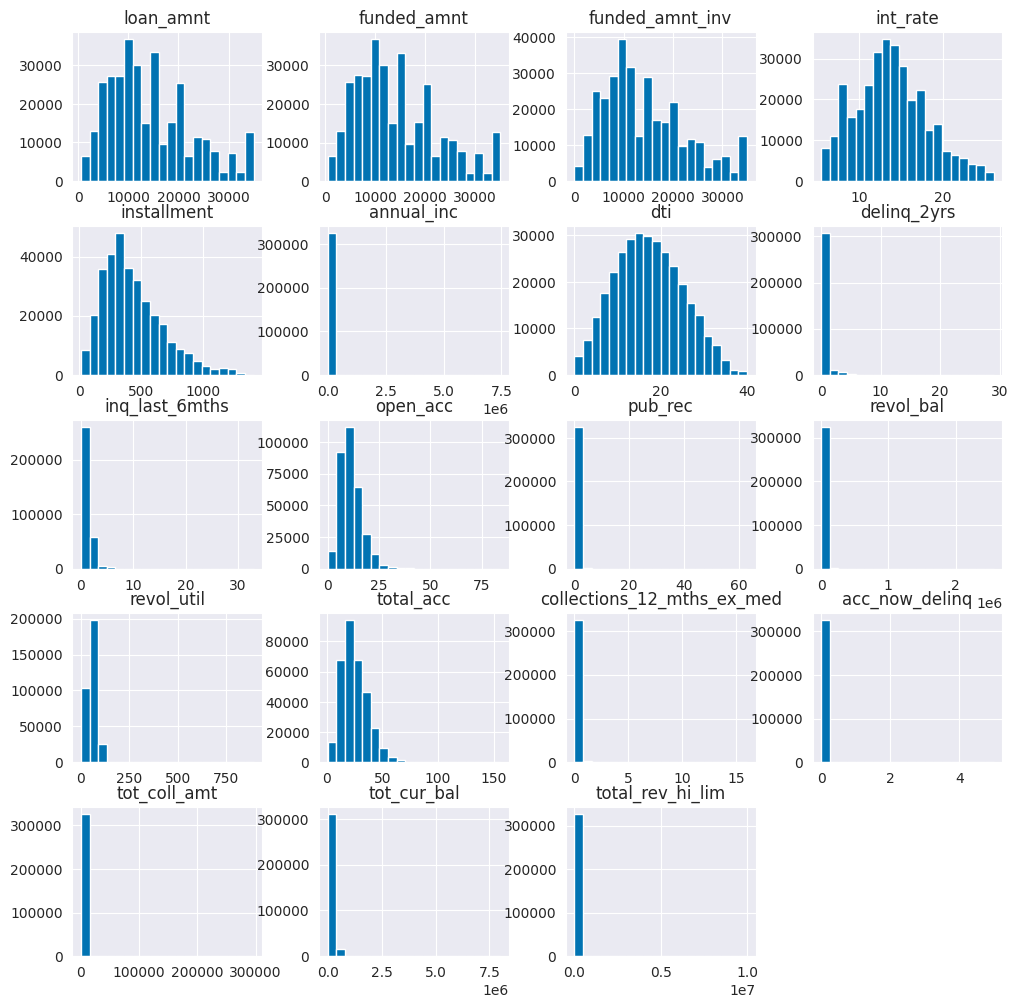

In [11]:
X_i[varc].hist(figsize=(12,12),bins=20)
plt.show()

In [12]:
minimos={x:np.percentile(X_i[x],1) for x in varc}
maximos={x:np.percentile(X_i[x],99) for x in varc}
X_i['extremos']=reduce(lambda x,y:x+y,map(lambda x:np.logical_or(X_i[x]<minimos[x],X_i[x]>maximos[x]),varc))
X_i[varc]=X_i[varc][X_i['extremos']==False]
X_i.dropna(inplace=True) #eliminamos los valores extremos

In [13]:
X_i['extremos'].sum(),X_i['extremos'].mean() # número,porcentaje de valores extremos

(0, 0.0)

In [14]:
X_i.drop('extremos',axis=1,inplace=True)

In [15]:
X_i[varc].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
loan_amnt,270762.0,14321.977881,7796.777188,1750.00,2400.0000,4000.00,8200.00,12375.00,20000.00,30000.0000,35000.00,35000.00
funded_amnt,270762.0,14297.300120,7783.102051,1750.00,2400.0000,4000.00,8125.00,12325.00,20000.00,30000.0000,35000.00,35000.00
funded_amnt_inv,270762.0,14249.919556,7786.850250,1500.00,2400.0000,4000.00,8000.00,12250.00,19750.00,30000.0000,35000.00,35000.00
int_rate,270762.0,13.634586,4.175625,6.03,6.0300,7.12,10.74,13.35,16.29,21.0000,23.76,24.89
installment,270762.0,429.668800,221.929976,57.41,79.4144,134.76,266.94,384.11,559.44,864.9665,1076.29,1190.28
annual_inc,270762.0,69502.753185,33707.729761,18700.00,22500.0000,30000.00,45000.00,62000.00,85000.00,135000.0000,185000.00,245000.00
dti,270762.0,17.416614,7.394843,1.66,3.0800,5.72,11.79,17.09,22.78,30.1800,33.58,34.69
delinq_2yrs,270762.0,0.237855,0.610041,0.00,0.0000,0.00,0.00,0.00,0.00,1.0000,3.00,4.00
inq_last_6mths,270762.0,0.743014,0.961225,0.00,0.0000,0.00,0.00,0.00,1.00,3.0000,4.00,4.00
open_acc,270762.0,11.095959,4.387054,3.00,4.0000,5.00,8.00,10.00,14.00,19.0000,24.00,26.00


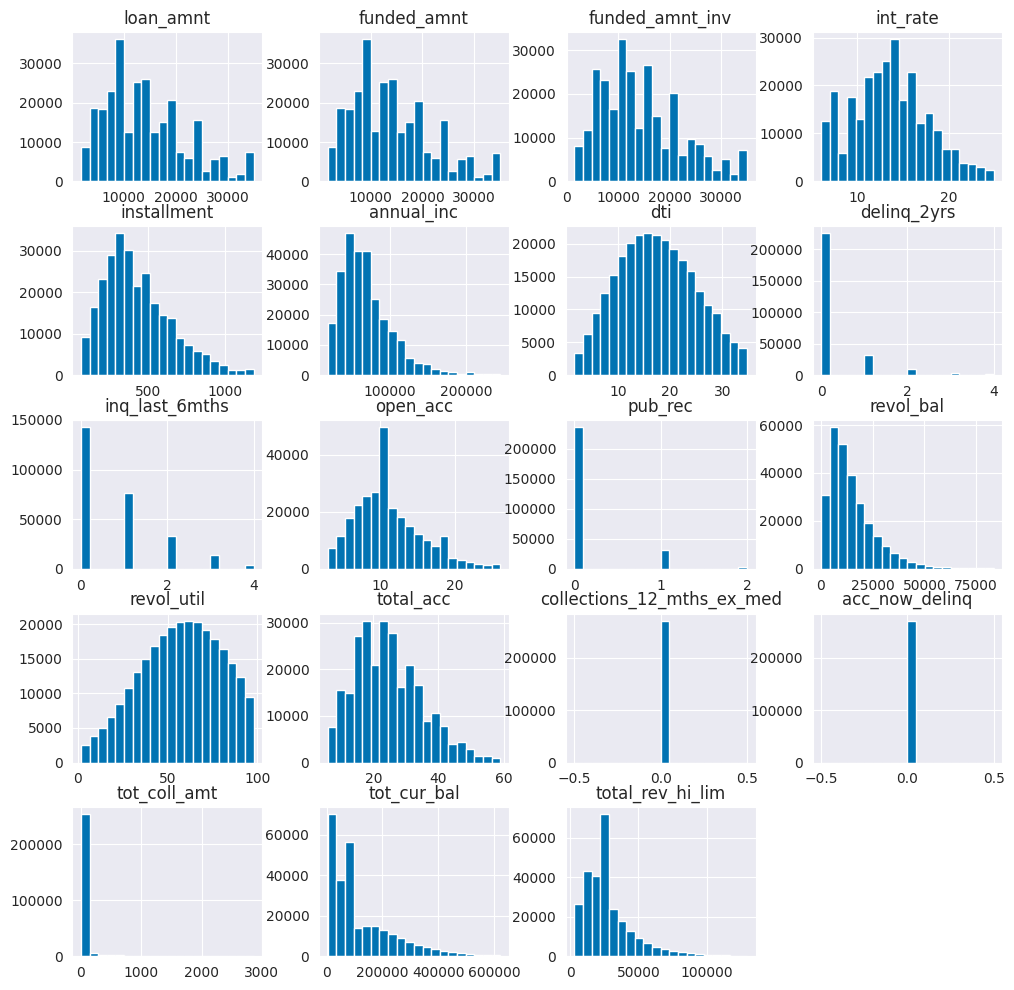

In [16]:
X_i[varc].hist(figsize=(12,12),bins=20)
plt.show()

#### Varianza de la variables

In [17]:
varanza_nula=[*filter(lambda x: X_i[x].var()==0,varc)] #variables con varianza nula
varanza_nula

['collections_12_mths_ex_med', 'acc_now_delinq']

In [18]:
varc=[x for x in varc if x not in varanza_nula] #eliminamos las variables con varianza nula

#### multicolinealidad (cluster de variables)

In [19]:
vc = VarClusHi(df=X_i[varc],feat_list=varc).varclus()
clusters=vc.rsquare
clusters

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,loan_amnt,0.991203,0.279008,1.220157e-02
1,0,funded_amnt,0.993330,0.279671,9.259921e-03
2,0,funded_amnt_inv,0.990542,0.279167,1.312104e-02
3,0,installment,0.938939,0.242902,8.065125e-02
4,1,tot_cur_bal,0.447371,0.085396,6.042271e-01
5,1,total_rev_hi_lim,0.643006,0.149697,4.198436e-01
6,1,revol_bal,0.680507,0.204121,4.014341e-01
7,1,annual_inc,0.495601,0.196892,6.280587e-01
8,2,dti,0.293669,0.039222,7.351662e-01
9,2,open_acc,0.776595,0.131019,2.570888e-01


In [20]:
bestc=clusters.sort_values(['Cluster','RS_Ratio']).groupby('Cluster').first().Variable.to_list()
bestc #mejores variables continuas sengun el cluster de variables

['funded_amnt',
 'revol_bal',
 'open_acc',
 'revol_util',
 'tot_coll_amt',
 'delinq_2yrs',
 'inq_last_6mths']

<Axes: >

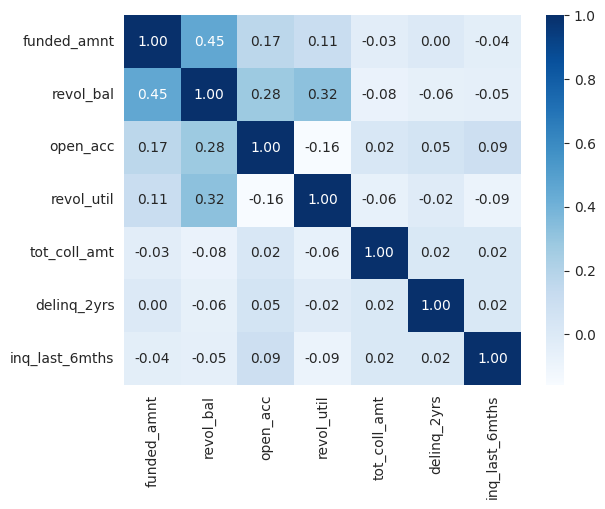

In [21]:
sns.heatmap(X_i[bestc].corr(),annot=True,fmt='.2f',cmap='Blues')

In [30]:
train[vard]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status
0,36 months,B,B1,10+ years,MORTGAGE,Not Verified,debt_consolidation,PA,f
1,36 months,A,A5,4 years,MORTGAGE,Source Verified,debt_consolidation,LA,f
2,60 months,D,D5,5 years,MORTGAGE,Source Verified,debt_consolidation,OH,w
3,36 months,A,A5,< 1 year,OWN,Source Verified,credit_card,CA,f
4,36 months,B,B2,NaN,RENT,Verified,debt_consolidation,NY,f
...,...,...,...,...,...,...,...,...,...
326394,36 months,A,A4,6 years,MORTGAGE,Not Verified,credit_card,IN,w
326395,36 months,C,C3,3 years,RENT,Verified,debt_consolidation,GA,w
326396,36 months,C,C5,8 years,MORTGAGE,Source Verified,debt_consolidation,SC,f
326397,36 months,B,B3,5 years,OWN,Verified,credit_card,MA,f
